MACHINE LEARNING

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import confusion_matrix

1. DECISION MAKING: WHICH DS IS THE BEST?

In [2]:
# TRAIN DFs
X_train_with_outliers_sel = pd.read_csv('../data/processed/X_train_with_outliers_sel.csv')
X_train_without_outliers_sel = pd.read_csv('../data/processed/X_train_without_outliers_sel.csv')
X_train_with_outliers_norm_sel = pd.read_csv('../data/processed/X_train_with_outliers_norm_sel.csv')
X_train_without_outliers_norm_sel = pd.read_csv('../data/processed/X_train_without_outliers_norm_sel.csv')
X_train_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_with_outliers_minmax_sel.csv')
X_train_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_train_without_outliers_minmax_sel.csv')
y_train = pd.read_csv('../data/processed/y_train.csv')

# TEST DFs
X_test_with_outliers_sel = pd.read_csv('../data/processed/X_test_with_outliers_sel.csv')
X_test_without_outliers_sel = pd.read_csv('../data/processed/X_test_without_outliers_sel.csv')
X_test_with_outliers_norm_sel = pd.read_csv('../data/processed/X_test_with_outliers_norm_sel.csv')
X_test_without_outliers_norm_sel = pd.read_csv('../data/processed/X_test_without_outliers_norm_sel.csv')
X_test_with_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_with_outliers_minmax_sel.csv')
X_test_without_outliers_minmax_sel = pd.read_csv('../data/processed/X_test_without_outliers_minmax_sel.csv')
y_test = pd.read_csv('../data/processed/y_test.csv')

In [3]:
datasets = {
    "With Outliers": (X_train_with_outliers_sel, X_test_with_outliers_sel),
    "Without Outliers": (X_train_without_outliers_sel, X_test_without_outliers_sel),
    "With Outliers (Normalized)": (X_train_with_outliers_norm_sel, X_test_with_outliers_norm_sel),
    "Without Outliers (Normalized)": (X_train_without_outliers_norm_sel, X_test_without_outliers_norm_sel),
    "With Outliers (MinMax)": (X_train_with_outliers_minmax_sel, X_test_with_outliers_minmax_sel),
    "Without Outliers (MinMax)": (X_train_without_outliers_minmax_sel, X_test_without_outliers_minmax_sel)
}

results = []
models = []

for dataset_name, (train_df, test_df) in datasets.items():
    model = LogisticRegression()
    model.fit(train_df, y_train)
    
    y_train_pred = model.predict(train_df)
    y_test_pred = model.predict(test_df)

    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
    test_f1 = f1_score(y_test, y_test_pred, average='weighted', zero_division=0)

    results.append({
        "Dataset Name": dataset_name,
        "Train Accuracy": train_accuracy,
        "Test Accuracy": test_accuracy,
        "Test Precision": test_precision ,
        "Test Recall": test_recall,
        "Test F1-Score": test_f1
    })

    models.append(model)

results_df = pd.DataFrame(results)
sorted_results_df = results_df.sort_values(by="Train Accuracy", ascending=False)

print(sorted_results_df)


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,

                    Dataset Name  Train Accuracy  Test Accuracy  \
4         With Outliers (MinMax)        0.900334       0.896309   
2     With Outliers (Normalized)        0.900334       0.896309   
1               Without Outliers        0.900152       0.895702   
0                  With Outliers        0.900152       0.896916   
3  Without Outliers (Normalized)        0.900152       0.895702   
5      Without Outliers (MinMax)        0.900152       0.895702   

   Test Precision  Test Recall  Test F1-Score  
4        0.881972     0.896309       0.868809  
2        0.882230     0.896309       0.868558  
1        0.881984     0.895702       0.866693  
0        0.882357     0.896916       0.870622  
3        0.882141     0.895702       0.866562  
5        0.881984     0.895702       0.866693  


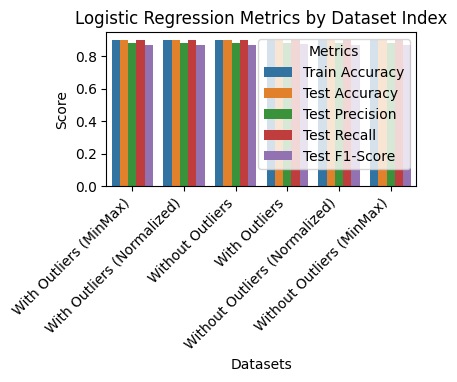

In [4]:
plt.figure(figsize=(4, 2))
sns.barplot(
    data=sorted_results_df.melt(
        id_vars=["Dataset Name"], 
        value_vars=["Train Accuracy", "Test Accuracy", "Test Precision", "Test Recall", "Test F1-Score"]
    ),
    x="Dataset Name",
    y="value", 
    hue="variable"
)
plt.title("Logistic Regression Metrics by Dataset Index")
plt.ylabel("Score")
plt.xlabel("Datasets")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Metrics")
plt.show()

Observations: 
- The best data set is 'X_train_with_outliers_minmax_sel' 

In [5]:
hyperparameters = {
    "penalty": ["l1"],
    "C": [0.1],
    "fit_intercept": [True],
    "solver": ["liblinear"],
}

In [6]:
scoring = {
    'mae': 'neg_mean_absolute_error',
    'rmse': 'neg_root_mean_squared_error'
}

In [7]:
grid = GridSearchCV(models[1], param_grid=hyperparameters, scoring=scoring, refit='rmse', cv= 5, verbose=1)
grid

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1], 'fit_intercept': [True], 'penalty': ['l1'],
                         'solver': ['liblinear']},
             refit='rmse',
             scoring={'mae': 'neg_mean_absolute_error',
                      'rmse': 'neg_root_mean_squared_error'},
             verbose=1)

In [8]:
grid.fit(X_train_with_outliers_minmax_sel, y_train)

Fitting 5 folds for each of 1 candidates, totalling 5 fits


/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/home/vscode/.local/lib/python3.10/site-packages/sklearn/utils/validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the s

GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.1], 'fit_intercept': [True], 'penalty': ['l1'],
                         'solver': ['liblinear']},
             refit='rmse',
             scoring={'mae': 'neg_mean_absolute_error',
                      'rmse': 'neg_root_mean_squared_error'},
             verbose=1)

In [9]:
print("Best parameters:", grid.best_params_)

Best parameters: {'C': 0.1, 'fit_intercept': True, 'penalty': 'l1', 'solver': 'liblinear'}


In [10]:
best_model = grid.best_estimator_
y_test_pred = best_model.predict(X_test_with_outliers_minmax_sel)
accuracy_score(y_test, y_test_pred)

0.8959446333171442

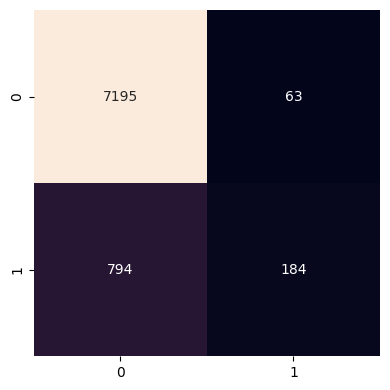

In [11]:
cm_dataset = confusion_matrix(y_test, y_test_pred)

cm_df = pd.DataFrame(cm_dataset)

plt.figure(figsize = (4, 4))
sns.heatmap(cm_df, annot=True, fmt="d", cbar=False)

plt.tight_layout()
plt.show()